In [3]:
import numpy as np # linear algebra
import json
from matplotlib import pyplot as plt
from skimage import color
from skimage.feature import hog
from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
import cv2  # importing cv
import imutils
import glob
from PIL import Image, ImageOps

#We need these in this file:
import sys
sys.path.append('cropping')
import load_read_name_extractor as lrne
import progressbar
import time

In [4]:
from tqdm.notebook import trange, tqdm
from time import sleep

In [5]:
def it_hog(img_list, ori, ppc, cpb, bn):
    hog_features = []
    temp_list = []
    size = len(img_list)
    progress_bar = tqdm(img_list, total=len(img_list), desc="Processing images")
    for i in range(size):
        temp_list.append(color.rgb2gray(img_list[i]))
        fd, hog_image = hog(temp_list[i], orientations=ori, pixels_per_cell=ppc,
                        cells_per_block=cpb, visualize=True, block_norm=bn)
        temp_list[i] = hog_image
        hog_features.append(fd)
        # Update the progress bar
        progress_bar.update(1)
    progress_bar.close()
    return temp_list, hog_features

In [6]:
def find_posible_hog(n_collumn, n_rows):  
    #i is ppc
    #j is cpb
    comb = []
    for i in range (1, 30):
        for j in range (1, 30):
            block_size=(i*j)/2
            if (block_size % 2 == 0):
                half_block_size=int((i*j)/2)
            else:
                half_block_size=(i*j)/2
            
            if (n_collumn % half_block_size == 0) and (n_rows % half_block_size == 0):
                comb.append((i,j))
    return comb
def mirror_each(img):
    mirror = cv2.flip(img,1)
    flip = cv2.flip(img,0)
    mirror_flip = cv2.flip(mirror,0)
    return [mirror, flip, mirror_flip]

def expand_with_mirror(img_list, names):
    temp_img_list = []
    temp_names = []
    for i in range(len(img_list)):
        mirrors = mirror_each(img_list[i])
        temp_img_list.append(img_list[i])
        temp_names.append(names[i])
        for j in range(len(mirrors)):
            temp_img_list.append(mirrors[j])
            temp_names.append(names[i])
    return temp_img_list, temp_names

In [8]:
img_list, names = lrne.load_name_and_img("cropped_mean/*jpeg")

In [9]:
len(img_list)

4915

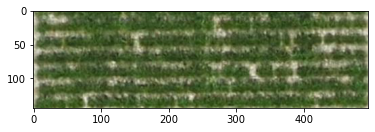

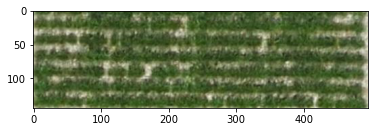

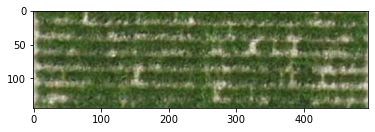

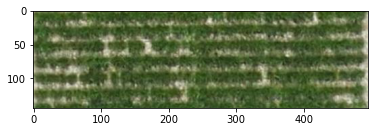

In [10]:
mirrors = mirror_each(img_list[0])
plt.imshow(img_list[0])
plt.show()
for img in mirrors:
    plt.imshow(img)
    plt.show()


In [11]:
img_list[0].shape

(144, 496, 3)

In [13]:
find_posible_hog(144, 496)

[(1, 1),
 (1, 2),
 (1, 4),
 (1, 8),
 (1, 16),
 (2, 1),
 (2, 2),
 (2, 4),
 (2, 8),
 (2, 16),
 (4, 1),
 (4, 2),
 (4, 4),
 (4, 8),
 (8, 1),
 (8, 2),
 (8, 4),
 (16, 1),
 (16, 2)]

In [14]:
hog_list =[(2, 2), (2, 4), (2, 8), (2, 16), (4, 2), (4, 4), (4, 8), (8, 2), (8, 4), (16, 2)]

In [14]:
%%capture output
pic_folders = ["cropped_mean/*jpeg", "cropped_min/*.jpeg"]
for k in range(len(pic_folders)):
    img_list, names = lrne.load_name_and_img(pic_folders[k])
    for i in range (hog_list):
        img_shape = img_list[0].shape
        ori=9
        ppc=(hog_list[i][0], hog_list[i][0])
        cpb=(hog_list[i][1],hog_list[i][1])
        bn="L2"
        mir = False
        if mir == True:
            img_list_t, names_t = expand_with_mirror(img_list, names)
            try:
                xxx, features = it_hog(img_list_t, ori=9, ppc=ppc, cpb=cpb, bn=bn)
                iteration = str(img_shape)+"_cells_"+str(ppc)+"_block_"+str(cpb)+"_norm_"+str(bn) + "_mir_" + str(mir)
                lrne.save_in_txt(names_t, "names/img_names_" + iteration)
                lrne.save_in_txt(features, "Features/hog_features_" + iteration)
            except ValueError as e:
                print("Error processing image: ","PPC: " + str(ppc),"CPB: " + str(cpb) ,  e)
                continue
        else:
            try:
                xxx, features = it_hog(img_list, ori=9, ppc=ppc, cpb=cpb, bn=bn)
                iteration = str(img_shape)+"_cells_"+str(ppc)+"_block_"+str(cpb)+"_norm_"+str(bn) + "_mir_" + str(mir)
                lrne.save_in_txt(names, "names/img_names_" + iteration)
                lrne.save_in_txt(features, "Features/hog_features_" + iteration)
            except ValueError as e:
                print("Error processing image: ","PPC: " + str(ppc),"CPB: " + str(cpb) ,  e)
                continue

Folder Progress:   0%|          | 0/1 [00:00<?, ?it/s]

Iteration of PPC and CPB:   0%|          | 0/24 [00:00<?, ?it/s]

Processing images:   0%|          | 0/4915 [00:00<?, ?it/s]

Processing images:   0%|          | 0/4915 [00:00<?, ?it/s]

Processing images:   0%|          | 0/4915 [00:00<?, ?it/s]

Processing images:   0%|          | 0/4915 [00:00<?, ?it/s]

Processing images:   0%|          | 0/4915 [00:00<?, ?it/s]

Processing images:   0%|          | 0/4915 [00:00<?, ?it/s]

Processing images:   0%|          | 0/4915 [00:00<?, ?it/s]

Processing images:   0%|          | 0/4915 [00:00<?, ?it/s]

Processing images:   0%|          | 0/4915 [00:00<?, ?it/s]

Processing images:   0%|          | 0/4915 [00:00<?, ?it/s]

Processing images:   0%|          | 0/4915 [00:00<?, ?it/s]

Processing images:   0%|          | 0/4915 [00:00<?, ?it/s]

Processing images:   0%|          | 0/4915 [00:00<?, ?it/s]

Processing images:   0%|          | 0/4915 [00:00<?, ?it/s]

Processing images:   0%|          | 0/4915 [00:00<?, ?it/s]

Processing images:   0%|          | 0/4915 [00:00<?, ?it/s]

Processing images:   0%|          | 0/4915 [00:00<?, ?it/s]

Processing images:   0%|          | 0/4915 [00:00<?, ?it/s]

Processing images:   0%|          | 0/4915 [00:00<?, ?it/s]

Error processing image:  PPC: (12, 12) CPB: (8, 8) negative dimensions are not allowed


Processing images:   0%|          | 0/4915 [00:00<?, ?it/s]

Processing images:   0%|          | 0/4915 [00:00<?, ?it/s]

Processing images:   0%|          | 0/4915 [00:00<?, ?it/s]

Processing images:   0%|          | 0/4915 [00:00<?, ?it/s]

Error processing image:  PPC: (14, 14) CPB: (8, 8) negative dimensions are not allowed


In [15]:
features[0].shape

(0,)